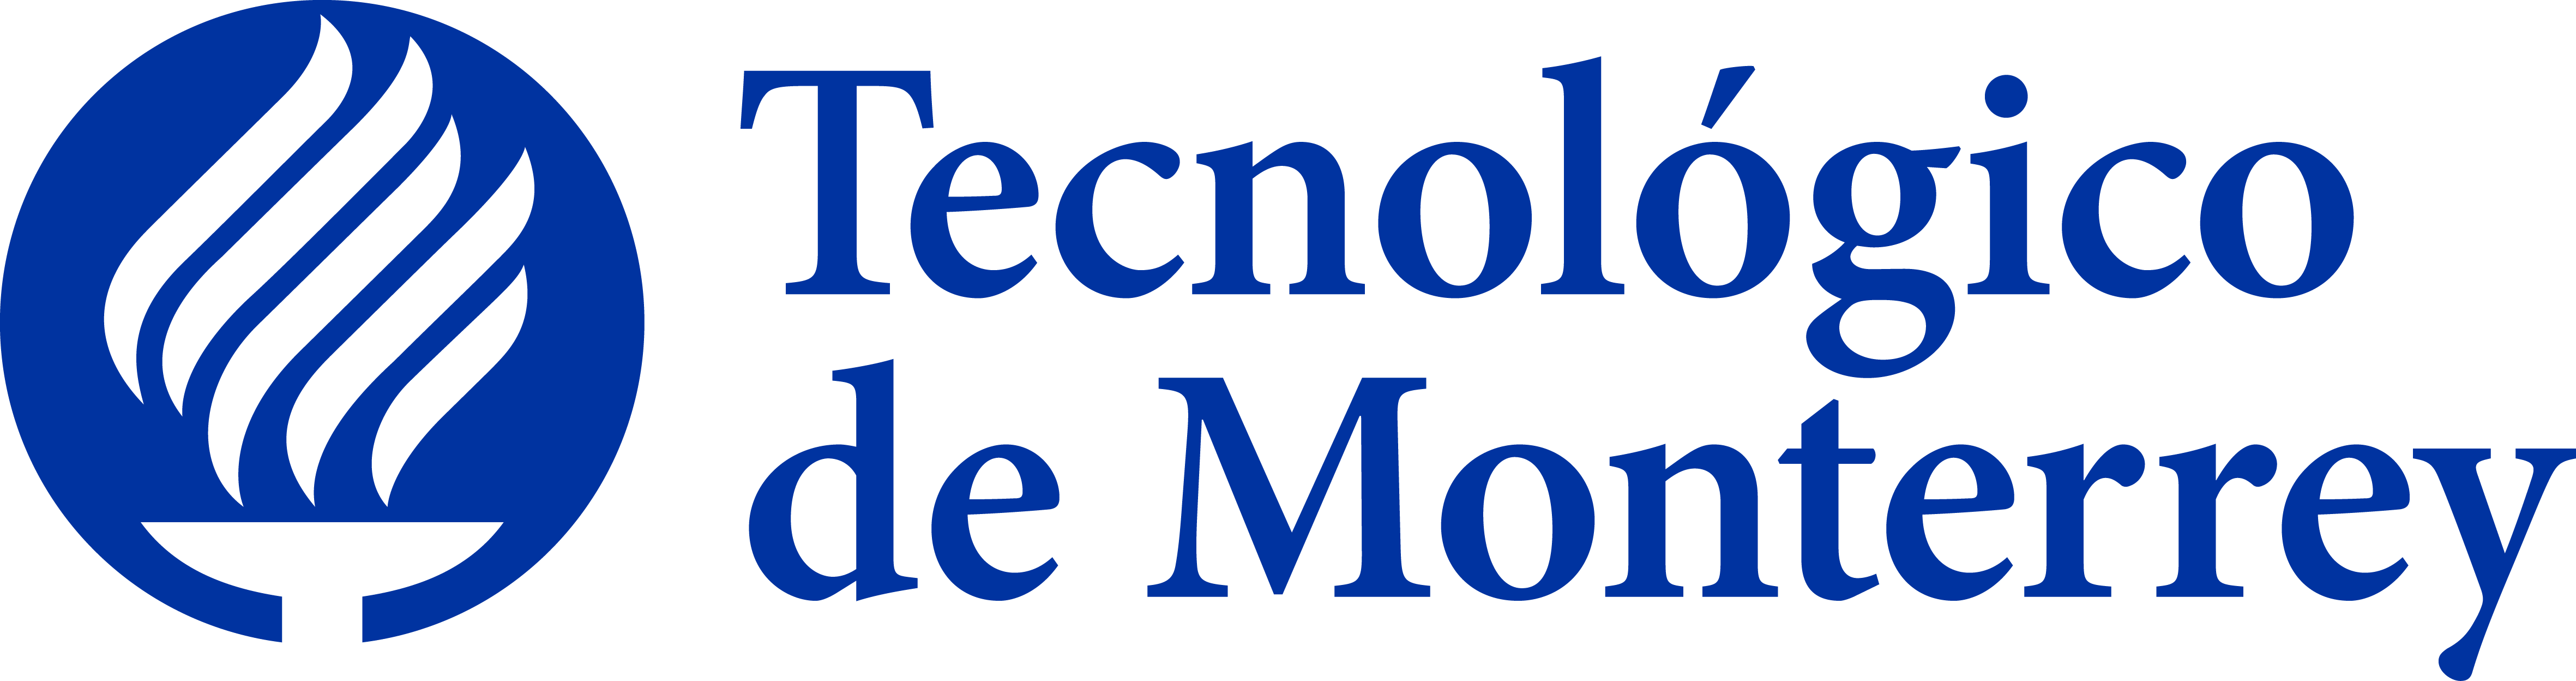

# **Master in Artificial Intelligence**

### Course: **Advanced Machine Learning Methods**

### Tecnológico de Monterrey

### Lead Professor José Antonio Cantoral Ceballos

## Team 38
*   A01794957 Tania Alicia Caballero Saavedra
*   A01283104 Kevin Dueñas Aguirre
*   A01794882 Francisco Marmolejo Martinez
*   A01795106 Francisco Javier Rupit Olvera
*   A01795093 Miguel Angel Alpizar Flores

## TC 5033
### Word Embeddings

<br>

#### Activity 3b: Text Classification using RNNs and AG_NEWS dataset in PyTorch
<br>

- Objective:
    - Understand the basics of Recurrent Neural Networks (RNNs) and their application in text classification.
    - Learn how to handle a real-world text dataset, AG_NEWS, in PyTorch.
    - Gain hands-on experience in defining, training, and evaluating a text classification model in PyTorch.
    
<br>

- Instructions:
    - Data Preparation: Starter code will be provided that loads the AG_NEWS dataset and prepares it for training. Do not modify this part. However, you should be sure to understand it, and comment it, the use of markdown cells is suggested.

    - Model Setup: A skeleton code for the RNN model class will be provided. Complete this class and use it to instantiate your model.

    - Implementing Accuracy Function: Write a function that takes model predictions and ground truth labels as input and returns the model's accuracy.

    - Training Function: Implement a function that performs training on the given model using the AG_NEWS dataset. Your model should achieve an accuracy of at least 80% to get full marks for this part.

    - Text Sampling: Write a function that takes a sample text as input and classifies it using your trained model.

    - Confusion Matrix: Implement a function to display the confusion matrix for your model on the test data.

    - Submission: Submit your completed Jupyter Notebook. Make sure to include a markdown cell at the beginning of the notebook that lists the names of all team members. Teams should consist of 3 to 4 members.
    
<br>

- Evaluation Criteria:

    - Correct setup of all the required libraries and modules (10%)
    - Code Quality (30%): Your code should be well-organized, clearly commented, and easy to follow. Use also markdown cells for clarity. Comments should be given for all the provided code, this will help you understand its functionality.
    
   - Functionality (60%):
        - All the functions should execute without errors and provide the expected outputs.
        - RNN model class (20%)
        - Accuracy fucntion (10%)
        - Training function (10%)
        - Sampling function (10%)
        - Confucion matrix (10%)

        - The model should achieve at least an 80% accuracy on the AG_NEWS test set for full marks in this criterion.


Dataset

https://pytorch.org/text/stable/datasets.html#text-classification

https://paperswithcode.com/dataset/ag-news


#### Install libraries (if needed)

You may need to install the following libraries to ensure version compatibility. After installing them, please Restart the Session (Runtime -> Restart Session)

In [ ]:
!pip install torch==2.0.1 torchvision==0.15.2 torchaudio==2.0.2 torchtext==0.15.2

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 619.9/619.9 MB 1.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.0/6.0 MB 81.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.4/4.4 MB 73.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 69.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 317.1/317.1 MB 2.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.8/11.8 MB 82.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.0/21.0 MB 91.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 849.3/849.3 kB 50.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 557.1/557.1 MB 1.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 168.4/168.4 MB 13.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.6/54.6 MB 39.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 102.6/102.6 MB 11.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 173.2

In [ ]:
!pip install scipy==1.9.3
!pip install scikit-plot
#you may receive a message of restarting session, this is OK

In [ ]:
!pip install portalocker
#please restar session after this intallation. After restarting go straight to importing the libraries

## Import libraries

In [ ]:
# The following libraries are required for running the given code
# Please feel free to add any libraries you consider adecuate to complete the assingment.
import numpy as np
#PyTorch libraries
import torch
from torchtext.datasets import AG_NEWS
# Dataloader library
from torch.utils.data import DataLoader
from torch.utils.data.dataset import random_split
# Libraries to prepare the data
from torchtext.data.utils import get_tokenizer
from torchtext.vocab import build_vocab_from_iterator
from torchtext.data.functional import to_map_style_dataset
# neural layers
from torch import nn
from torch.nn import functional as F

# These libraries are suggested to plot confusion matrix
# you may use others
import scikitplot as skplt
import gc

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import random
from sklearn.metrics import confusion_matrix

In [ ]:
# Use GPU if available
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(device)

cuda


### Get the train and the test datasets and dataloaders

Classes:

* 1 - World

* 2 - Sports

* 3 - Business

* 4 - Sci/Tech

We will convert them to:

* 0 - World

* 1 - Sports

* 2 - Business

* 3 - Sci/Tech

In [ ]:
#To get AG_NEWS streaming
train_dataset, test_dataset = AG_NEWS()
#Pytorch uses Iterable / Map Style dataset. In this case we used map-style (Like a dictionary or list)
#where each item can accessed via an index
train_dataset, test_dataset = to_map_style_dataset(train_dataset), to_map_style_dataset(test_dataset)

In [ ]:
#Example of train data
train_dataset[0:5]

[(3,
  "Wall St. Bears Claw Back Into the Black (Reuters) Reuters - Short-sellers, Wall Street's dwindling\\band of ultra-cynics, are seeing green again."),
 (3,
  'Carlyle Looks Toward Commercial Aerospace (Reuters) Reuters - Private investment firm Carlyle Group,\\which has a reputation for making well-timed and occasionally\\controversial plays in the defense industry, has quietly placed\\its bets on another part of the market.'),
 (3,
  "Oil and Economy Cloud Stocks' Outlook (Reuters) Reuters - Soaring crude prices plus worries\\about the economy and the outlook for earnings are expected to\\hang over the stock market next week during the depth of the\\summer doldrums."),
 (3,
  'Iraq Halts Oil Exports from Main Southern Pipeline (Reuters) Reuters - Authorities have halted oil export\\flows from the main pipeline in southern Iraq after\\intelligence showed a rebel militia could strike\\infrastructure, an oil official said on Saturday.'),
 (3,
  'Oil prices soar to all-time record, 

In [ ]:
# Get the tokeniser
# tokeniser object
tokeniser = get_tokenizer('basic_english')

def yield_tokens(data):
    for _, text in data:
        yield tokeniser(text)

In [ ]:
# Build the vocabulary
vocab = build_vocab_from_iterator(yield_tokens(train_dataset), specials=["<unk>"])
#set unknown token at position 0
vocab.set_default_index(vocab["<unk>"])

In [ ]:
#Example of vocab
for idx, token in enumerate(vocab.get_itos()):
    if idx >= 50:
        break
    print(f"Token: {token}, Index: {idx}")

In [ ]:
#test function tokeniser
tokens = tokeniser('Welcome to TC5033')
print(tokens, vocab(tokens))

['welcome', 'to', 'tc5033'] [3314, 4, 0]


In [ ]:
#Split train data set in Train and Val dataset
NUM_TRAIN = int(len(train_dataset)*0.9)
NUM_VAL = len(train_dataset) - NUM_TRAIN

In [ ]:
#Split train data set in Train and Val dataset
train_dataset, val_dataset = random_split(train_dataset, [NUM_TRAIN, NUM_VAL])

In [ ]:
print(len(train_dataset), len(val_dataset), len(test_dataset))

108000 12000 7600


In [ ]:
# function passed to the DataLoader to process a batch of data as indicated
def collate_batch(batch):
    # Get label and text
    y, x = list(zip(*batch))

    # Create list with indices from tokeniser
    x = [vocab(tokeniser(text)) for text in x]
    x = [t + ([0]*(max_tokens - len(t))) if len(t) < max_tokens else t[:max_tokens] for t in x]

    # Prepare the labels, by subtracting 1 to get them in the range 0-3
    return torch.tensor(x, dtype=torch.int32), torch.tensor(y, dtype=torch.int32) - 1

In [ ]:
#Define the classes
labels =  ["World", "Sports", "Business", "Sci/Tech"]
#Define max_tokens and Batch_size
max_tokens = 50
BATCH_SIZE = 256

In [ ]:
#Creates a dataLoader (Train, val and test) object in PyTorch
#collate_fn has an function input defined previously collate_batch
train_loader = DataLoader(train_dataset, batch_size=BATCH_SIZE, collate_fn=collate_batch, shuffle = True)
val_loader = DataLoader(val_dataset, batch_size=BATCH_SIZE, collate_fn=collate_batch, shuffle = True)
test_loader = DataLoader(test_dataset, batch_size=BATCH_SIZE, collate_fn=collate_batch, shuffle = True)

### Let us build our RNN model



In [ ]:
class RNN_Model_1(nn.Module):
    #Class RNN_Model_1 implemented using PyTorch nn.Module
    def __init__(self, embed_size, hidden, layers, num_classes):
        #Initialization
        #embed_size = Embedding vectors size
        #hidden = Hidden layers
        #num_clases = Output
        super().__init__()
        #Transform token indices into dense vector
        self.embedding_layer = nn.Embedding(num_embeddings=len(vocab),
                                            embedding_dim=embed_size)

        # You may use PyTorch nn.GRU(), nn.RNN(), or nn.LSTM()
        self.rnn = nn.LSTM(input_size=embed_size,
                           hidden_size=hidden,
                           num_layers=layers,
                           batch_first=True)
        #Fully connected that maps hidden layer / num_classes
        self.fc = nn.Linear(hidden, num_classes)

    def forward(self, x):
        #Define forward pass through the network
        #embedding_layer converts each token into dense vector
        x = self.embedding_layer(x)
        #Output of LSTM model; hidden and cell states
        rnn_out, (hidden, cell) = self.rnn(x)
        #Output Score for each class
        output = self.fc(hidden[-1])
        return output

In [ ]:
def accuracy(model, loader):
    #Function to calculate accuracy
    #Parameters: trained model, dataset (dataloader)
    #Set model to evaluation mode
    model.eval()
    #Initialize counters
    correct_predictions = 0
    total_samples = 0

    #Optimization: gradient calculation is not needed
    with torch.no_grad():
        for inputs, labels in loader:
            #To avoid error Expected all tensors to be on the same device
            inputs, labels = inputs.to(next(model.parameters()).device),labels.to(next(model.parameters()).device)
            #Make predictions
            #Model's forward pass (scores)
            outputs = model(inputs)
            #torch.max(outputs, dim=1) find the highest score
            _, predicted = torch.max(outputs, dim=1)

            #Count correct predictions
            correct_predictions += (predicted == labels).sum().item()
            total_samples += labels.size(0)

            #Print for each loader predicted values
            #Enable for understanding purpose
            #print("Predicted:", predicted.cpu().numpy())
            #print("True Labels:", labels.cpu().numpy())

    accuracy = 100.0 * correct_predictions / total_samples

    return accuracy

In [ ]:
def train(model, optimiser, criterion=nn.CrossEntropyLoss(), epochs=100):
    #Train function
    #We used CrossEntropyLoss for loss function, commonly in classification cases
    #Enable the model to a device
    model.to(device)

    for epoch in range(epochs):
        #Set the model in training mode
        model.train()
        #counter
        running_loss = 0.0

        for inputs, labels in train_loader:
            #Moves data to device
            inputs, labels = inputs.to(device), labels.to(device).long()
            #initialize gradient in zero
            optimiser.zero_grad()
            #Pass train data set to the model
            outputs = model(inputs)
            #Calculate the loss
            loss = criterion(outputs, labels)
            #Calculate the loss respect to each parameter
            loss.backward()
            #Using Adam optimizer, updates the model to adjust the model weights
            optimiser.step()
            #Counter of loss
            running_loss += loss.item()
        #Average of the loss
        avg_loss = running_loss / len(train_loader)
        print(f"Epoch {epoch + 1}, Loss: {avg_loss:.4f}")
    print(f'Accuracy model is: {accuracy(rnn_model, test_loader):.4f}')

In [ ]:
def sample_text(model, dataset):
      """Classifies a random sample from the loader and prints its labels."""
      #To create a random input of dataset
      index=random.randint(0,len(dataset)-1)
      ysample, xsample = list(test_dataset[index])
      #to obtain the token vector using the dictionary vocab
      tok = vocab(tokeniser(xsample))
      #Model evaluation
      model.eval()
      #Convert in a form Tensor the token vector
      tok = torch.tensor(tok, dtype=torch.int32).unsqueeze(0).to(device)
      #Store the scores
      scores = model(tok)
      #To obtain the class prediction
      prediction=scores.argmax(dim=1).item()
      #Print results
      print(f"Sample Text: {xsample}")
      print(f"Predicted Label: {labels[prediction]}")
      print(f"True Label: {labels[ysample-1]}")

In [ ]:
def generate_confusion_matrix(model, loader):
    """Generates and displays a confusion matrix using Seaborn."""

    all_predictions = []
    all_labels = []
    # Set the model to evaluation mode
    model.eval()
    #Optimization: gradient calculation is not needed
    with torch.no_grad():
        for x, y in loader:
            #Move the data to the device
            x = x.to(device)
            y = y.to(device)
            #Store the score of the model
            scores = model(x)
            #Predicted class row
            _, predictions = scores.max(dim=1)

            all_predictions.extend(predictions.cpu().numpy())
            all_labels.extend(y.cpu().numpy())

    # Create the confusion matrix
    cm = confusion_matrix(all_labels, all_predictions)

    # Plot the confusion matrix using Seaborn
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
                xticklabels=labels, yticklabels=labels)
    plt.xlabel("Predicted Labels")
    plt.ylabel("True Labels")
    plt.title("Confusion Matrix")
    plt.show()

### Training, Testing RNN model using LSTM

In [ ]:
#Initial parameters
EMBEDDING_SIZE = 300
NEURONS = 256
LAYERS = 2
NUM_CLASSES = 4
epochs = 6
lr = 0.0005

In [ ]:
#Initialize the model
rnn_model = RNN_Model_1(EMBEDDING_SIZE, NEURONS, LAYERS, NUM_CLASSES)
#Set type of optimizer
optimiser = torch.optim.Adam(rnn_model.parameters(), lr=lr)

In [ ]:
#Training the model
train(rnn_model, optimiser=optimiser,  epochs=epochs)

Epoch 1, Loss: 0.7146
Epoch 2, Loss: 0.3157
Epoch 3, Loss: 0.2359
Epoch 4, Loss: 0.1830
Epoch 5, Loss: 0.1488
Epoch 6, Loss: 0.1160
Accuracy model is: 90.3947


In [ ]:
sample_text(rnn_model, test_dataset)

Sample Text: Hurricane Ivan Slams U.S. Gulf Coast Hurricane Ivan roared into the Gulf Coast near Mobile, Alabama, early this morning with peak winds exceeding 125 miles an hour (200 kilometers an hour).
Predicted Label: Sci/Tech
True Label: Sci/Tech


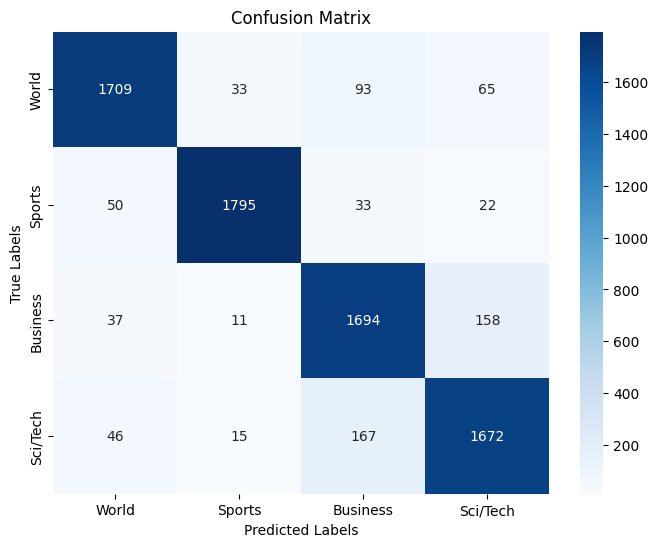

In [ ]:
generate_confusion_matrix(rnn_model, test_loader)